<a href="https://colab.research.google.com/github/fatem7/epl_2023-2024/blob/main/epl_2024_home_advantages_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.style.use('seaborn-v0_8-dark')

In [9]:
df=pd.read_csv('2024 epl.csv')

In [10]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,full time home team goals,full time away team goals,FTR,home team half time goals,away team half time goals,...,home shot on target,away shot on target,home fouls,away fouls,home corner,away corner,home yallow,away yallow,home red,away red
0,E0,11/8/2023,20:00,Burnley,Man City,0,3,A,0,2,...,1,8,11,8,6,5,0,0,1,0
1,E0,12/8/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,7,2,12,12,8,3,2,2,0,0
2,E0,12/8/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,5,3,9,14,10,4,1,4,0,0
3,E0,12/8/2023,15:00,Brighton,Luton,4,1,H,1,0,...,12,3,11,12,6,7,2,2,0,0
4,E0,12/8/2023,15:00,Everton,Fulham,0,1,A,0,0,...,9,2,12,6,10,4,0,2,0,0


In [11]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam',
       'full time home team goals', 'full time away team goals', 'FTR',
       'home team half time goals', 'away team half time goals ',
       'half time winner', 'Referee', 'home shot', 'away shot',
       'home shot on target', 'away shot on target', 'home fouls',
       'away fouls', 'home corner', 'away corner', 'home yallow',
       'away yallow', 'home red', 'away red'],
      dtype='object')

In [12]:
df = df.rename(columns={'HTAG':'away team half time golas'})
df.head()


,Div,Date,Time,HomeTeam,AwayTeam,full time home team goals,full time away team goals,FTR,home team half time goals,away team half time goals,...,home shot on target,away shot on target,home fouls,away fouls,home corner,away corner,home yallow,away yallow,home red,away red
0,E0,11/8/2023,20:00,Burnley,Man City,0,3,A,0,2,...,1,8,11,8,6,5,0,0,1,0
1,E0,12/8/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,7,2,12,12,8,3,2,2,0,0
2,E0,12/8/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,5,3,9,14,10,4,1,4,0,0
3,E0,12/8/2023,15:00,Brighton,Luton,4,1,H,1,0,...,12,3,11,12,6,7,2,2,0,0
4,E0,12/8/2023,15:00,Everton,Fulham,0,1,A,0,0,...,9,2,12,6,10,4,0,2,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Div                         380 non-null    object
 1   Date                        380 non-null    object
 2   Time                        380 non-null    object
 3   HomeTeam                    380 non-null    object
 4   AwayTeam                    380 non-null    object
 5   full time home team goals   380 non-null    int64 
 6   full time away team goals   380 non-null    int64 
 7   FTR                         380 non-null    object
 8   home team half time goals   380 non-null    int64 
 9   away team half time goals   380 non-null    int64 
 10  half time winner            380 non-null    object
 11  Referee                     380 non-null    object
 12  home shot                   380 non-null    int64 
 13  away shot                   380 non-null    int64 

# Find out the number of matches each team won at home

In [14]:
home=df.groupby('HomeTeam')['FTR'].value_counts()

home_df = pd.DataFrame(home)
home_df.head()


count
HomeTeam    FTR       
Arsenal     H       15
            D        2
            A        2
Aston Villa H       12
            D        4

convert the privios df to pivot table to get better understanding

In [15]:
home_df = home_df.pivot_table(values='count', index='HomeTeam', columns='FTR')
home_df=home_df.rename(columns={'A':'loseHome','D':'DrawHome','H':'WinHome'})
home_df.fillna(0, inplace=True)
home_df = home_df.astype(int)
home_df

FTR,loseHome,DrawHome,WinHome
HomeTeam,,,
Arsenal,2,2,15
Aston Villa,3,4,12
Bournemouth,6,6,7
Brentford,7,7,5
Brighton,5,6,8
Burnley,13,4,2
Chelsea,4,4,11
Crystal Palace,7,4,8
Everton,7,4,8


# Find out  the number of matches each team won away

In [16]:
away=df.groupby('AwayTeam')['FTR'].value_counts()
away_df=pd.DataFrame(away)
away_df=away_df.pivot_table(values='count',index='AwayTeam',columns='FTR')
away_df=away_df.rename(columns={'A':'WinAway','D':'DrawAway','H':'loseAway'
})
away_df

FTR,WinAway,DrawAway,loseAway
AwayTeam,,,
Arsenal,13,3,3
Aston Villa,8,4,7
Bournemouth,6,3,10
Brentford,5,2,12
Brighton,4,6,9
Burnley,3,5,11
Chelsea,7,5,7
Crystal Palace,5,6,8
Everton,5,5,9


bar plot to compare the result for each team away

# concat the pivot table of the result at home and away

In [17]:
result=pd.concat([home_df,away_df],axis=1)

result.index.name='teams'
result.head()
result['TotalDraw']=result['DrawHome'] + result['DrawAway']
result['Totallose']=result['loseHome'] + result['loseAway']
result['Totalwin']=result['WinHome'] + result['WinAway']
result.sort_values(by='Totalwin',ascending=False)

FTR,loseHome,DrawHome,WinHome,WinAway,DrawAway,loseAway,TotalDraw,Totallose,Totalwin
teams,,,,,,,,,
Arsenal,2,2,15,13,3,3,5,5,28
Man City,0,5,14,14,2,3,7,3,28
Liverpool,1,3,15,9,7,3,10,4,24
Tottenham,6,0,13,7,6,6,6,12,20
Aston Villa,3,4,12,8,4,7,8,10,20
Chelsea,4,4,11,7,5,7,9,11,18
Man United,6,3,10,8,3,8,6,14,18
Newcastle,3,4,12,6,2,11,6,14,18
West Ham,4,8,7,7,2,10,10,14,14


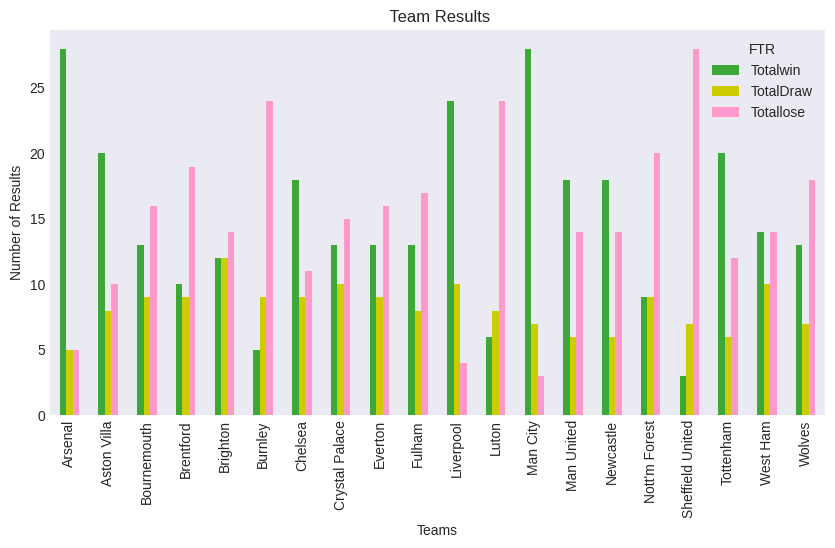

In [18]:
compare=pd.DataFrame(result[['Totalwin','TotalDraw','Totallose']])
color=['#3da738','#cccc00','#ff99cc']
compare.plot(kind='bar',figsize=(10,5),color=color)
plt.title(' Team Results')
plt.xlabel('Teams')
plt.ylabel('Number of Results')
plt.show()


# studing the advantage of playing at home and the advantage of oudince

comparing the number of wins at home and away

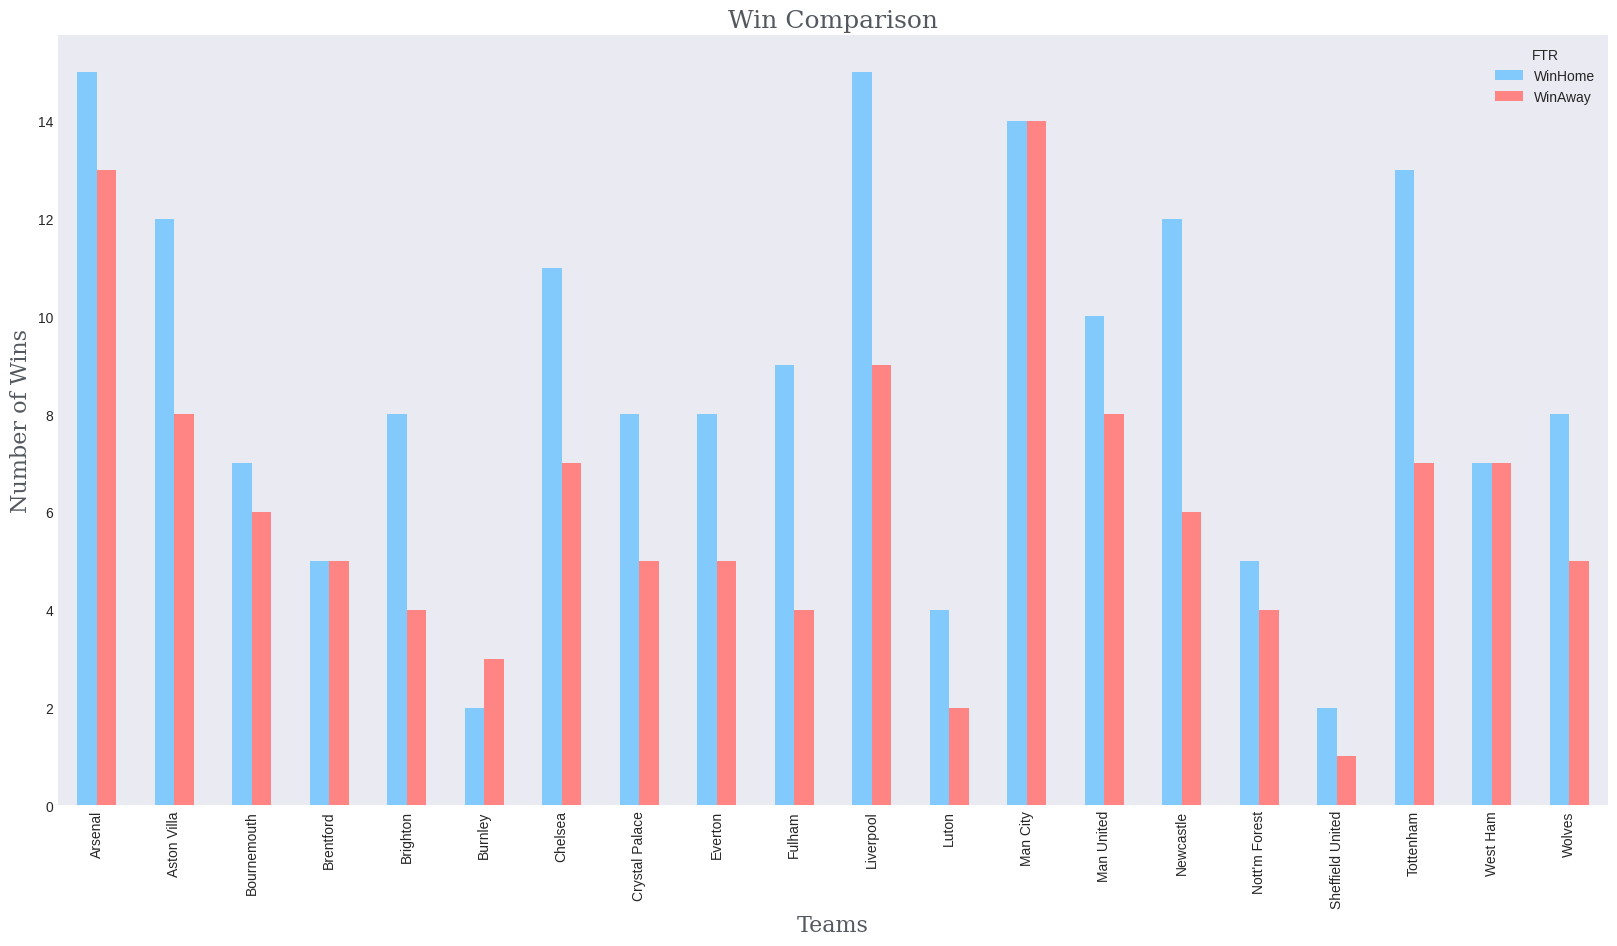

In [19]:

color=['#82cafc','#ff8484']
result[['WinHome', 'WinAway']].plot(kind='bar', figsize=(20, 10),color=color)
plt.title('Win Comparison',fontsize=18,fontdict={'family': 'serif', 'color': '#53585f', 'weight': 'normal'})
plt.xlabel('Teams',fontsize=16,fontdict={'family': 'serif', 'color': '#53585f', 'weight': 'normal'})
plt.ylabel('Number of Wins',fontsize=16,fontdict={'family': 'serif', 'color': '#53585f', 'weight': 'normal'})
plt.show()


comparing the loses at home and outside

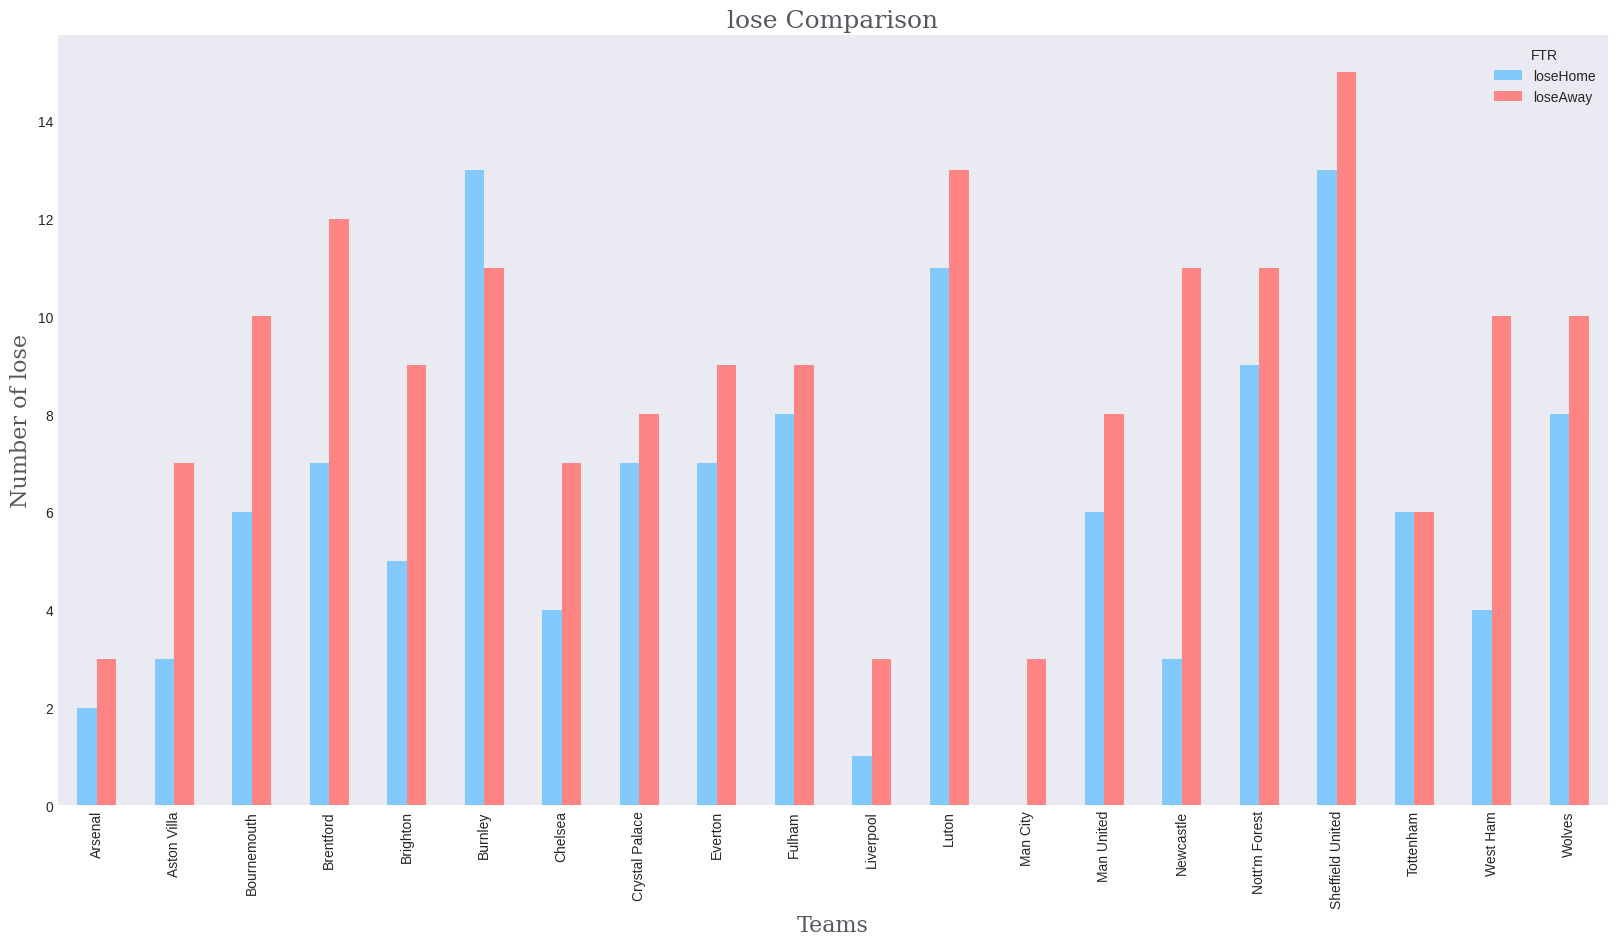

In [20]:
color=['#82cafc','#ff8484']
result[['loseHome', 'loseAway']].plot(kind='bar', figsize=(20, 10),color=color)
plt.title('lose Comparison',fontsize=18,fontdict={'family': 'serif', 'color': '#53585f', 'weight': 'normal'})
plt.xlabel('Teams',fontsize=16,fontdict={'family': 'serif', 'color': '#53585f', 'weight': 'normal'})
plt.ylabel('Number of lose',fontsize=16,fontdict={'family': 'serif', 'color': '#53585f', 'weight': 'normal'})
plt.show()


# compare the number of goals at home and away for each team

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Div                         380 non-null    object
 1   Date                        380 non-null    object
 2   Time                        380 non-null    object
 3   HomeTeam                    380 non-null    object
 4   AwayTeam                    380 non-null    object
 5   full time home team goals   380 non-null    int64 
 6   full time away team goals   380 non-null    int64 
 7   FTR                         380 non-null    object
 8   home team half time goals   380 non-null    int64 
 9   away team half time goals   380 non-null    int64 
 10  half time winner            380 non-null    object
 11  Referee                     380 non-null    object
 12  home shot                   380 non-null    int64 
 13  away shot                   380 non-null    int64 

home goals

In [22]:
homegoals=df.groupby('HomeTeam')['full time home team goals'].sum()
homegoals=pd.DataFrame(homegoals)
homegoals

,full time home team goals
HomeTeam,
Arsenal,48
Aston Villa,48
Bournemouth,27
Brentford,29
Brighton,30
Burnley,19
Chelsea,44
Crystal Palace,37
Everton,22


away goals

In [23]:
awaygoals=df.groupby('AwayTeam')['full time away team goals'].sum()
awaygoals=pd.DataFrame(awaygoals)
awaygoals

,full time away team goals
AwayTeam,
Arsenal,43
Aston Villa,28
Bournemouth,27
Brentford,27
Brighton,25
Burnley,22
Chelsea,33
Crystal Palace,20
Everton,18


concat the 2 privious df to compare them

In [24]:
goals=pd.concat([homegoals,awaygoals ], axis=1)
goals.columns = ['home goals','away goals']
goals.index.name='teams'
goals['total']=goals['home goals']+ goals['away goals']
goals=goals.sort_values(by='total',ascending=False )
goals

,home goals,away goals,total
teams,,,
Man City,51,45,96
Arsenal,48,43,91
Liverpool,49,37,86
Newcastle,49,36,85
Chelsea,44,33,77
Aston Villa,48,28,76
Tottenham,38,36,74
West Ham,31,29,60
Crystal Palace,37,20,57


make pie chart to compare total number of goals that teams scored at home and away

Text(0.5, 1.0, 'Goals Distribution')

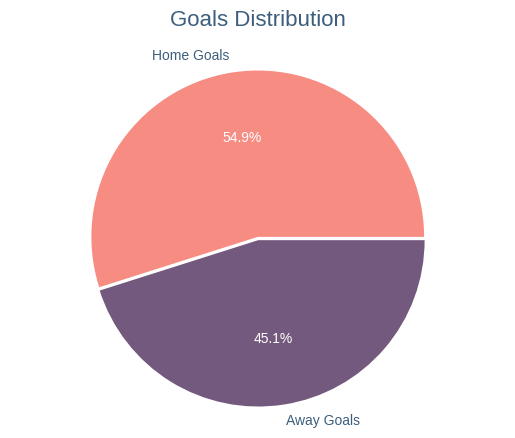

In [25]:
s=goals['home goals'].sum()
a=goals['away goals'].sum()
size=[s,a]
label='Home Goals','Away Goals'
colors=['#f78c83','#73597d']
patches,autotexts,texts=plt.pie(size, labels=label, autopct='%1.1f%%',colors=colors,labeldistance=1.1,explode=[0,0.02])
for autotext in autotexts:
    autotext.set_color('#3d5f7d')
for text in texts:
    text.set_color('white')
plt.axis('equal')
plt.title('Goals Distribution', fontdict={"fontsize":16},
    pad=20,color='#3d5f7d')

stack bar chart to compare the number of goals scored at home and away for each team

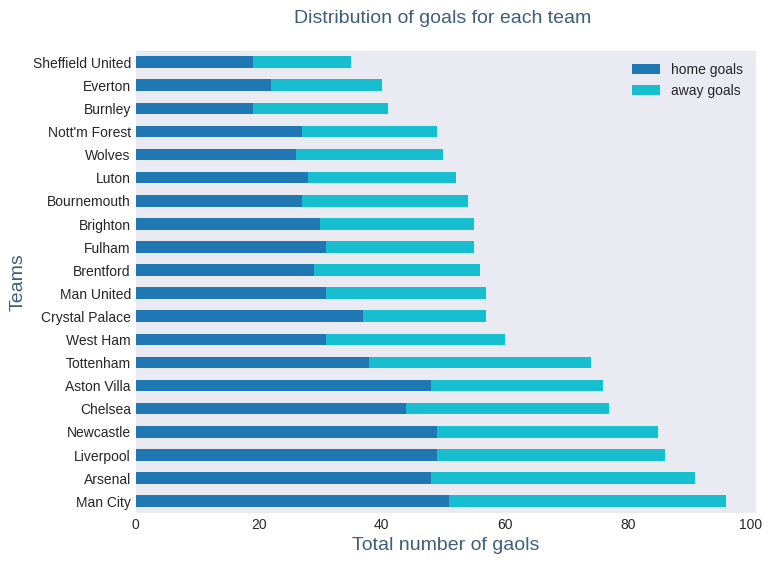

In [26]:
ax = goals[['home goals','away goals']].plot.barh(stacked=True, cmap='tab10', figsize=(8, 6))
ax.set_ylabel('Teams', fontdict={"fontsize":14},color='#3d5f7d')
ax.set_xlabel('Total number of gaols', fontdict={"fontsize":14},color='#3d5f7d')
ax.set_title('Distribution of goals for each team ', fontdict={"fontsize":14},
    pad=20,color='#3d5f7d')
plt.show()

#find out the number of shot on target for each team

shot on target at home

In [27]:
home_shot=df.groupby('HomeTeam')['home shot on target'].sum().sort_values(ascending=False)
home_shot.head()

HomeTeam
Liverpool    175
Man City     129
Arsenal      127
Chelsea      124
Newcastle    123
Name: home shot on target, dtype: int64

number of shot away

In [28]:
away_shot=df.groupby('AwayTeam')['away shot on target'].sum().sort_values(ascending=False)

total shot for each team at home and away

In [29]:
shot=pd.concat([home_shot,away_shot], axis=1)
shot['total shot']=shot['home shot on target'] + shot['away shot on target']
shot

,home shot on target,away shot on target,total shot
Liverpool,175,102,277
Man City,129,149,278
Arsenal,127,100,227
Chelsea,124,91,215
Newcastle,123,90,213
Tottenham,121,93,214
Man United,116,77,193
Brighton,113,95,208
Aston Villa,105,85,190
Bournemouth,98,87,185


#concat the tabel of goals and table of shot to find the percentage of goals scored compared to shots


In [30]:
missing=pd.concat([shot,goals],axis=1)
missing

,home shot on target,away shot on target,total shot,home goals,away goals,total
Liverpool,175,102,277,49,37,86
Man City,129,149,278,51,45,96
Arsenal,127,100,227,48,43,91
Chelsea,124,91,215,44,33,77
Newcastle,123,90,213,49,36,85
Tottenham,121,93,214,38,36,74
Man United,116,77,193,31,26,57
Brighton,113,95,208,30,25,55
Aston Villa,105,85,190,48,28,76
Bournemouth,98,87,185,27,27,54


find the percentage of goals scored compared to shots at home and away

In [31]:
goal_percentage_home = ((missing['home goals'] / missing['home shot on target']) * 100).round(2)
goal_percentage_home=goal_percentage_home.sort_values(ascending=False)


goal_percentage_away = ((missing['away goals'] / missing['away shot on target']) * 100).round(2)
goal_percentage_away=goal_percentage_away


goal_percentage = pd.DataFrame({'goal_percentage_home': goal_percentage_home, 'goal_percentage_away':goal_percentage_away})
goal_percentage

,goal_percentage_home,goal_percentage_away
Arsenal,37.80,43.00
Aston Villa,45.71,32.94
Bournemouth,27.55,31.03
Brentford,34.12,31.03
Brighton,26.55,26.32
Burnley,26.03,31.88
Chelsea,35.48,36.26
Crystal Palace,38.54,27.40
Everton,23.16,26.87
Fulham,36.47,25.81


find the total  the percentage of goals scored compared to shots

In [32]:
total_goal_percentage = ((missing['total'] / missing['total shot']) * 100).round(1)

total_goal_percentage=total_goal_percentage.sort_values(ascending=True)
total_goal_percentage = total_goal_percentage.to_frame()
total_goal_percentage.columns = ['goals_percentage']

total_goal_percentage

,goals_percentage
Everton,24.7
Brighton,26.4
Sheffield United,27.1
Burnley,28.9
Bournemouth,29.2
Man United,29.5
Fulham,30.9
Liverpool,31.0
Wolves,31.4
Brentford,32.6


find out which team has hiegher ratio and which has lower

<ipython-input-33-0b89e321d131>:3: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = total_goal_percentage['goals_percentage'].plot.barh(color=color ,cmap='tab10', figsize=(8, 6))
<ipython-input-33-0b89e321d131>:3: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax = total_goal_percentage['goals_percentage'].plot.barh(color=color ,cmap='tab10', figsize=(8, 6))


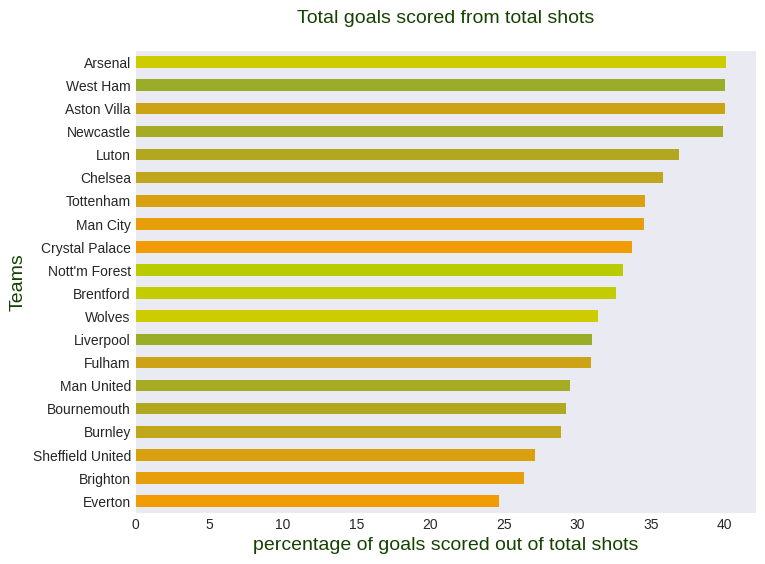

In [33]:
color=['#f29c05','#e69e0a','#d9a10f','#bfa61a', '#b2a81f',  '#a6ab24','#cca314',  '#99ad29','#cccc00',	  '#c2cc00', 	  '#b8cc00']

ax = total_goal_percentage['goals_percentage'].plot.barh(color=color ,cmap='tab10', figsize=(8, 6))

ax.set_ylabel('Teams', fontdict={"fontsize":14},color='#144200')

ax.set_xlabel('percentage of goals scored out of total shots', fontdict={"fontsize":14},color='#144200')

ax.set_title('Total goals scored from total shots', fontdict={"fontsize":14},  pad=20,color='#144200')

plt.show()